In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
hf_energy = -7.767362135748557
fci_energy = -7.784460280031223

In [7]:
f = h5py.File("data/lih.hdf5", "r")
ds = f["ds"][:]
energies = f["energies"][:]
f.close()

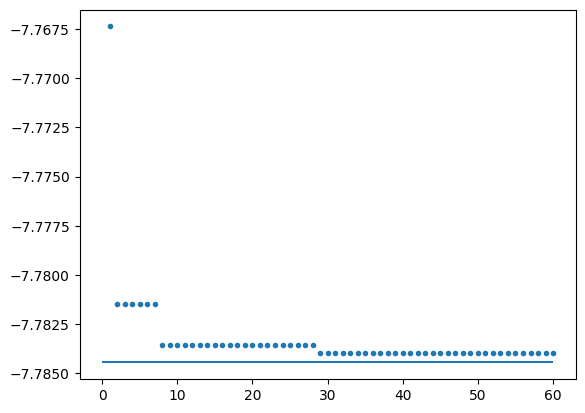

In [8]:
fig, ax = plt.subplots()
ax.plot(ds, energies, '.')
ax.hlines(fci_energy, 0., np.max(ds))

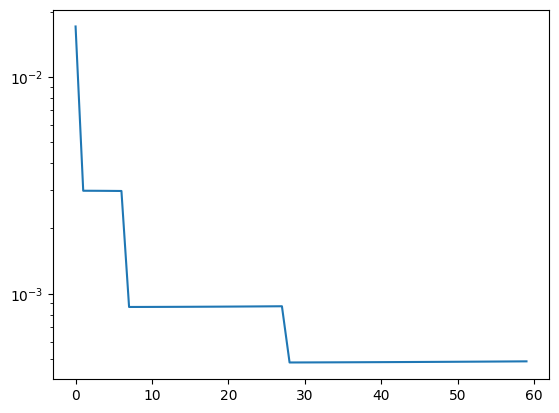

In [9]:
errs = np.abs(energies - fci_energy)
fig, ax = plt.subplots()
ax.plot(errs)
ax.set_yscale("log")